In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import os
from sqlalchemy import create_engine, inspect,desc

In [67]:
database_path = "Resources/hawaii.sqlite"

In [68]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [69]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [70]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [71]:
session = Session(engine)

In [72]:
inspector = inspect(engine)

In [73]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [74]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [75]:
session = Session(engine)


In [76]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [77]:
session.query(Measurement .date).order_by(Measurement .date.desc()).first()

('2017-08-23',)

In [78]:
session.query(Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08

In [79]:
query=session.query(Measurement.date,Measurement.prcp ).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

In [80]:
df= pd.DataFrame(query)
df.columns=["Date","Scores"]
df.set_index("Date")


,Scores
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


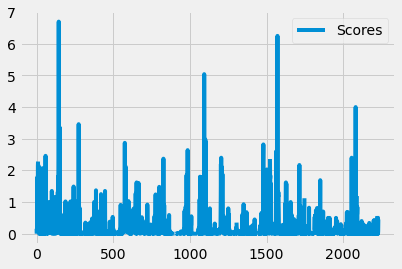

In [81]:
df.plot(kind="line")
plt.show()

In [82]:
df.describe()

,Scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
session.query(Station.station).group_by(Station.station).count()

9

In [93]:
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).first()

('USC00519281', 2772)

In [94]:
session.query(Station.id, func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp))\
    .where(Station.station == 'USC00519281').all()

C:\Users\12104\anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:362: SAWarning: SELECT statement has a cartesian product between FROM element(s) "station" and FROM element "measurement".  Apply join condition(s) between each element to resolve.
  util.warn(message)


[(7, 0.0, 11.53, 0.16064353974479206)]

In [96]:
temps= session.query(Station.id,Measurement.tobs).filter(Measurement.date >= '2016-08-23').where(Station.id == 7).all()

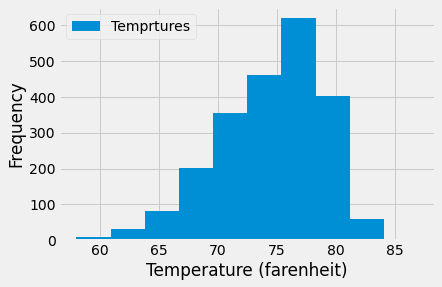

In [100]:
df= pd.DataFrame(temps)
df.columns=["ID","Temprtures"]
df = df.set_index("ID")
df.plot(kind="hist")
plt.xlabel("Temperature (farenheit)")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()